Fuzzy Tipping Problem
=====

In [1]:
import sys
print('Python version = ' + sys.version)

for p in sys.path:
    print(p)

Python version = 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]

/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/home/jos/.local/lib/python3.6/site-packages
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/lib/python3/dist-packages/IPython/extensions
/home/jos/.ipython


serv_lo =  [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]


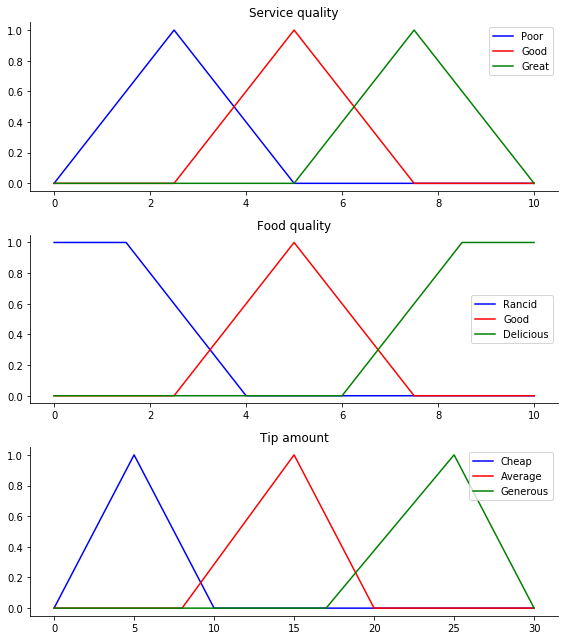

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

%matplotlib inline  

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_serv = np.arange(0, 10.5, 0.5)
x_qual = np.arange(0, 10.5, 0.5)
x_tip  = np.arange(0, 30.5, 0.5)

# Generate fuzzy membership functions
serv_lo = fuzz.trimf(x_serv, [0, 2.5, 5])
print('serv_lo = ', serv_lo)
serv_md = fuzz.trimf(x_serv, [2.5, 5, 7.5])
serv_hi = fuzz.trimf(x_serv, [5, 7.5, 10])

qual_lo = fuzz.trapmf(x_qual, [0, 0, 1.5, 4])
qual_md = fuzz.trimf(x_qual, [2.5, 5, 7.5])
qual_hi = fuzz.trapmf(x_qual, [6, 8.5, 10, 10])

tip_lo = fuzz.trimf(x_tip, [0, 5, 10])
tip_md = fuzz.trimf(x_tip, [8, 15, 20])
tip_hi = fuzz.trimf(x_tip, [17, 25, 30])

# Visualize these universes and membership functions
fig, (ax1, ax0, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Rancid')
ax0.plot(x_qual, qual_md, 'r', linewidth=1.5, label='Good')
ax0.plot(x_qual, qual_hi, 'g', linewidth=1.5, label='Delicious')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'r', linewidth=1.5, label='Good')
ax1.plot(x_serv, serv_hi, 'g', linewidth=1.5, label='Great')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Cheap')
ax2.plot(x_tip, tip_md, 'r', linewidth=1.5, label='Average')
ax2.plot(x_tip, tip_hi, 'g', linewidth=1.5, label='Generous')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


Interpolation qual_level_lo  8.5  =  0.0
Interpolation qual_level_md =  0.0
Interpolation qual_level_hi =  1.0
Interpolation serv_level_lo =  0.0
Interpolation serv_level_md =  1.0
Interpolation serv_level_hi =  0.0
Rule 1:  0.0
Rule 1:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Rule 2:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.07142857
 0.14285714 0.21428571 0.28571429 0.35714286 0.42857143 0.5
 0.57142857 0.64285714 0.71428571 0.78571429 0.85714286 0.92857143
 1.         0.9        0.8        0.7        0.6        0.5
 0.4        0.3        0.2        0.1        0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.   

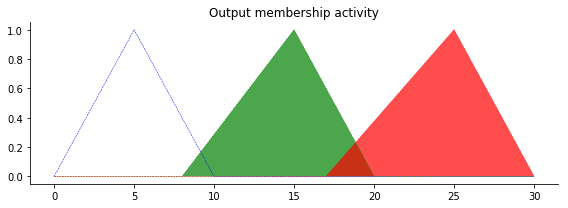

In [3]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!

qual = 8.5
serv = 5

# interpolation 
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, qual)
print('Interpolation qual_level_lo ', qual, ' = ', qual_level_lo)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, qual)
print('Interpolation qual_level_md = ', qual_level_md)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, qual)
print('Interpolation qual_level_hi = ', qual_level_hi)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, serv)
print('Interpolation serv_level_lo = ', serv_level_lo)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, serv)
print('Interpolation serv_level_md = ', serv_level_md)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, serv)
print('Interpolation serv_level_hi = ', serv_level_hi)

# Now we take our rules and apply them. 
# Rule 1 concerns: bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
print('Rule 1: ', active_rule1,)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0
print('Rule 1: ', tip_activation_lo)

# For Rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)
print('Rule 2: ', tip_activation_md)

# For Rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
print('Rule 3: ', tip_activation_hi)


tip0 = np.zeros_like(x_tip)
print('?? ', tip0)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()



aggregated =  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.07142857
 0.14285714 0.21428571 0.28571429 0.35714286 0.42857143 0.5
 0.57142857 0.64285714 0.71428571 0.78571429 0.85714286 0.92857143
 1.         0.9        0.8        0.7        0.6        0.5
 0.4        0.3        0.25       0.3125     0.375      0.4375
 0.5        0.5625     0.625      0.6875     0.75       0.8125
 0.875      0.9375     1.         0.9        0.8        0.7
 0.6        0.5        0.4        0.3        0.2        0.1
 0.        ]
tip =  19.380781089414185


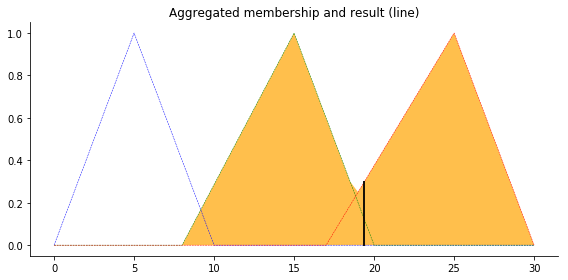

In [4]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo, np.fmax(tip_activation_md, tip_activation_hi))
print('aggregated = ',  aggregated)

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
print('tip = ', tip)
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 4))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=2.0, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [5]:
print(x_tip)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30. ]


In [6]:
print(tip_lo)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3
 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0. ]
